<a href="https://colab.research.google.com/github/JasmankaurBal/SCT_ML_2/blob/main/SCT_ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

!pip install kaggle

from google.colab import files
files.upload()


!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial


!unzip customer-segmentation-tutorial.zip



Saving kaggle.json to kaggle.json
403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/vjchoudhary7/customer-segmentation-tutorial
unzip:  cannot find or open customer-segmentation-tutorial.zip, customer-segmentation-tutorial.zip.zip or customer-segmentation-tutorial.zip.ZIP.


In [6]:

#  Install Kaggle
!pip install -q kaggle

#  Upload kaggle.json (one-time per Colab session)
from google.colab import files, output
uploaded = files.upload()   # click "Choose file" and upload your kaggle.json

#  Move uploaded json to ~/.kaggle with correct name & permissions (robust to auto-rename)
import os, shutil, stat
for fn in uploaded.keys():
    if fn.endswith('.json'):
        os.makedirs('/root/.kaggle', exist_ok=True)
        shutil.copy(fn, '/root/.kaggle/kaggle.json')
        os.chmod('/root/.kaggle/kaggle.json', 0o600)
        print("Saved kaggle json to /root/.kaggle/kaggle.json")


Saving kaggle.json to kaggle (1).json
Saved kaggle json to /root/.kaggle/kaggle.json


In [7]:
#  Download the dataset using the Kaggle slug (this dataset's slug)
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

#  List files to see the downloaded zip name
!ls -lh

# Unzip any zip files present (safe wildcard)
!unzip -o "*.zip"
!ls -lh


Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 4.85MB/s]
total 16K
-rw-r--r-- 1 root root 1.6K Oct  3  2019  customer-segmentation-tutorial-in-python.zip
-rw-r--r-- 1 root root   69 Sep 16 10:46 'kaggle (1).json'
-rw-r--r-- 1 root root   69 Sep 16 10:36  kaggle.json
drwxr-xr-x 1 root root 4.0K Sep  9 13:46  sample_data
Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      
total 20K
-rw-r--r-- 1 root root 1.6K Oct  3  2019  customer-segmentation-tutorial-in-python.zip
-rw-r--r-- 1 root root   69 Sep 16 10:46 'kaggle (1).json'
-rw-r--r-- 1 root root   69 Sep 16 10:36  kaggle.json
-rw-r--r-- 1 root root 3.9K Oct  3  2019  Mall_Customers.csv
drwxr-xr-x 1 root root 4.0K Sep  9 13:46  sample_data


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


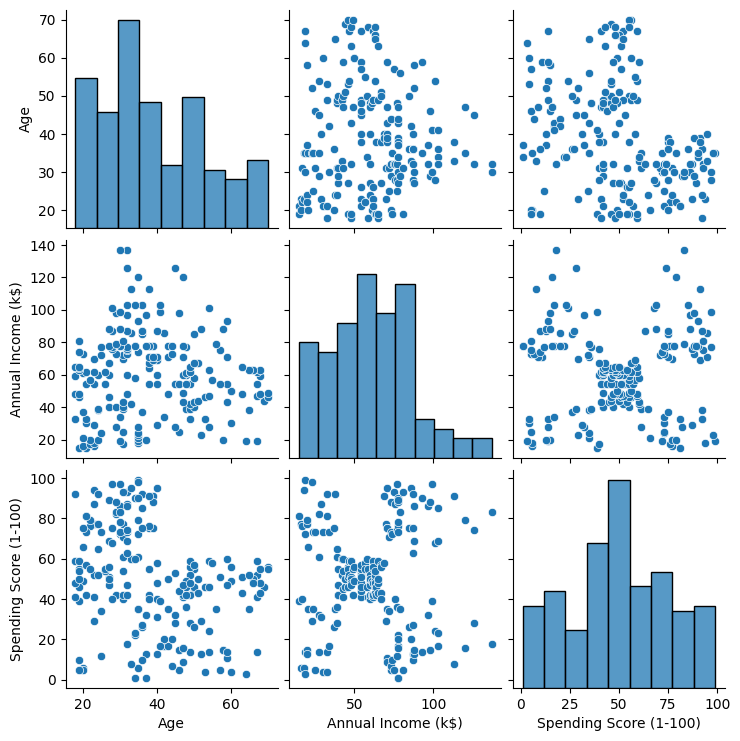

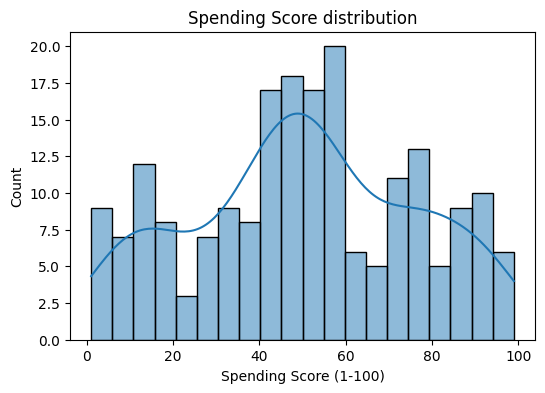

In [8]:
import pandas as pd
# adjust filename if output shows slightly different name
df = pd.read_csv('Mall_Customers.csv')
df.head(), df.shape, df.columns.tolist()
import matplotlib.pyplot as plt
import seaborn as sns

# basic stats
display(df.describe(), df.isnull().sum())

# pairwise scatter (quick)
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.show()

# distribution of Spending Score
plt.figure(figsize=(6,4)); sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True); plt.title('Spending Score distribution'); plt.show()


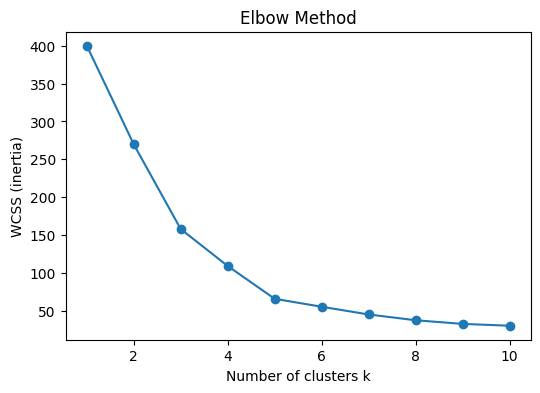

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of clusters k')
plt.ylabel('WCSS (inertia)')
plt.title('Elbow Method')
plt.show()

k = 5  # set after elbow inspection
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# add labels to dataframe
df['Cluster'] = labels
df['Cluster'] = df['Cluster'].astype(int)
df.head()



In [16]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1nRaeBeklPASh-R4XndEYyA6ndyhEUQJD_nI1m2FiN0M/edit#gid=0


In [17]:
k = 5  # set after elbow inspection
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# add labels to dataframe
df['Cluster'] = labels
df['Cluster'] = df['Cluster'].astype(int)
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


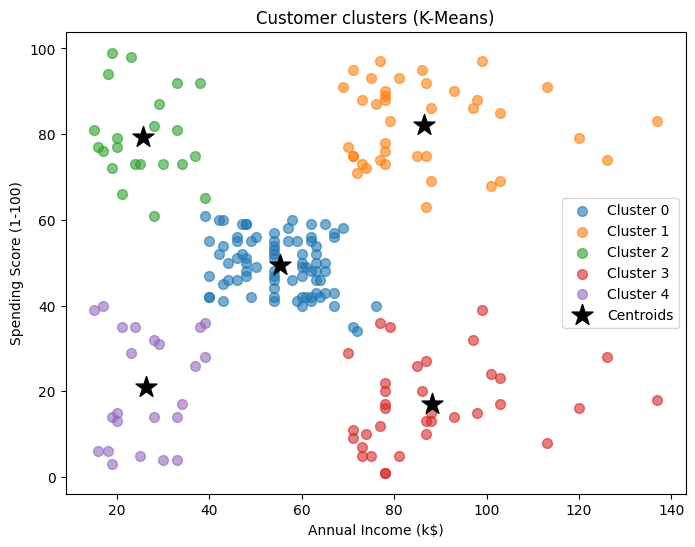

,count
Cluster,
0,81
1,39
2,22
3,35
4,23


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.7,55.3,49.5
1,32.7,86.5,82.1
2,25.3,25.7,79.4
3,41.1,88.2,17.1
4,45.2,26.3,20.9


In [23]:
plt.figure(figsize=(8,6))
palette = sns.color_palette("bright", k)
for i in range(k):
    plt.scatter(X[labels==i,0], X[labels==i,1], s=50, label=f'Cluster {i}', alpha=0.6)
# plot centroids (inverse transform if scaled)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:,0], centroids[:,1], s=250, marker='*', c='black', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer clusters (K-Means)')
plt.legend()
plt.show()
import os


# Cluster sizes and mean stats
cluster_summary = df.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean().round(1)
cluster_counts = df['Cluster'].value_counts().sort_index()
display(cluster_counts, cluster_summary)


